# Game Theory

Homogeneity

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.colors import Normalize
import itertools
import matplotlib.colors as mcolors




In [62]:
# Parameters
I_p = 0.2  # Green image
G_p = 0.5  # Green sensitivity of Producer
C_N = 0.4  # Cost of product (normal price)
C_T = 0.1*C_N  # Extra cost for True Price
G_c = 0.5  # Green sensitivity of Consumer


In [63]:
# Functions for dx/dt and dy/dt
def system(states, t, I_p, G_p, C_N, C_T, G_c):
    x, y = states
    m = I_p + G_p
    n = -C_T + G_c

    dx_dt = x * (1 - x) * (m * y + I_p)
    dy_dt = y * (1 - y) * (n * x - C_N)
    return [dx_dt, dy_dt]

In [64]:
def det_trace(x, y, I_p, G_p, C_N, C_T, G_c):
    m = I_p + G_p
    n = -C_T + G_c
    J11 = (1-2*x)*(m*y+I_p)
    J12 = x*m*(1-x)
    J21 = n*y*(1-y)
    J22 = (1-2*y)*(n*x-C_N)
    J = np.array([[J11, J12], [J21, J22]])
    det = J11*J22 - J12*J21
    trace = J11 + J22
    eig = np.linalg.eigvals(J)
    return det, trace, eig


def stability(x, y, I_p, G_p, C_N, C_T, G_c):
    det, trace, eig = det_trace(x, y, I_p, G_p, C_N, C_T, G_c)
    if det < 0:
        return 'Saddle (semistable)'
    elif trace > 0 and 0<det<trace**2/4:
        return 'Source (repeller) - unstable'
    elif trace < 0 and 0<det<trace**2/4:
        return 'Sink (attractor) - stable'
    elif trace > 0 and det == 0:
        return 'Source (repeller) - unstable (lines)'
    elif trace < 0 and det == 0:
        return 'Sink (attractor) - stable (lines)'
    elif trace > 0 and det == trace**2/4:
        return 'Semispiral source (repeller) - unstable'
    elif trace < 0 and det == trace**2/4:
        return 'Semispiral sink (attractor) - stable'
    elif trace >0 and det > trace**2/4:
        return 'Spiral source (repeller) - unstable'
    elif trace <0 and det > trace**2/4:
        return 'Spiral sink (attractor) - stable'
    elif trace == 0 and det > trace**2/4:
        return 'Center - stable'

    

### Case 1:

(0,0) and (1,1) are stable: bistable dynamics

Depends on initial conditions

C:\Users\iklennert\AppData\Local\Temp\ipykernel_4356\127494693.py:32: RuntimeWarning: invalid value encountered in divide
  U, V = U/N, V/N


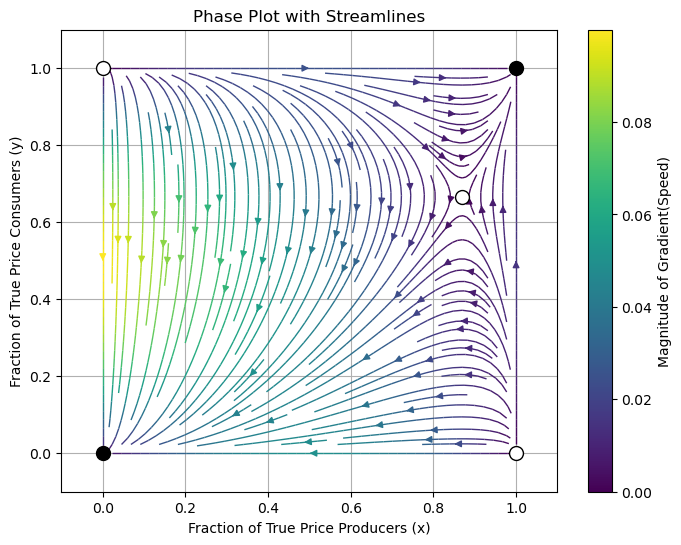

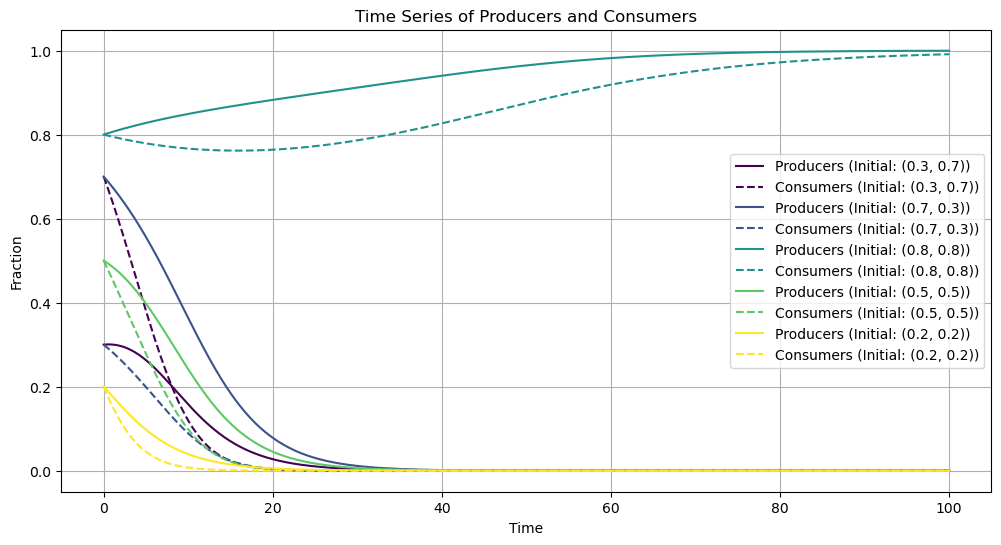

  Equilibrium point (0,0): Det=0.1, Trace=-0.6, Eigenvalues=-0.2 & -0.4, stability=Sink (attractor) - stable
  Equilibrium point (1,0): Det=0.0, Trace=0.3, Eigenvalues=0.2 & 0.1, stability=Source (repeller) - unstable
  Equilibrium point (0,1): Det=0.0, Trace=0.5, Eigenvalues=0.1 & 0.4, stability=Source (repeller) - unstable
  Equilibrium point (1,1): Det=0.0, Trace=-0.2, Eigenvalues=-0.1 & -0.1, stability=Sink (attractor) - stable
  Equilibrium point (0.8695652173913044,0.6666666666666667): Det=-0.0, Trace=-0.0, Eigenvalues=0.1 & -0.1, stability=Saddle (semistable)


In [74]:
t = np.linspace(0, 100, 1000)

# Parameters
I_p = -0.2  # Green image
G_p = 0.5  # Green sensitivity of Producer
C_N = 0.4  # Cost of product (normal price)
C_T = 0.1*C_N  # Extra cost for True Price
G_c = 0.5  # Green sensitivity of Consumer

initial_conditions = [
    (0.3, 0.7), 
    (0.7, 0.3),
    (0.8, 0.8),
    (0.5, 0.5),
    (0.2, 0.2)

]

xgrid = np.linspace(0, 1, 100)  # More points for a smoother field
ygrid = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xgrid, ygrid)
U, V = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(xgrid.size):
    for j in range(ygrid.size):
        xdot, ydot = system([X[i, j], Y[i, j]], 0, I_p, G_p, C_N, C_T, G_c)
        U[i, j] = xdot
        V[i, j] = ydot

# Normalize the arrows
N = np.sqrt(U**2 + V**2)
U, V = U/N, V/N


# Generate the plot
plt.figure(figsize=(8, 6))
strm = plt.streamplot(X, Y, U, V, density=1.5, color=N, cmap='viridis', linewidth=1)
plt.colorbar(strm.lines, label='Magnitude of Gradient(Speed)')

plt.xlabel('Fraction of True Price Producers (x)')
plt.ylabel('Fraction of True Price Consumers (y)')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Phase Plot with Streamlines')
plt.grid()
plt.plot(0, 0, 'ok', markersize=10)  
plt.plot(1, 0, 'ow', markeredgecolor='k', markersize=10)  
plt.plot(0, 1, 'ow', markeredgecolor='k', markersize=10)  
plt.plot(1, 1, 'ok', markersize=10)  
x_star = C_N/(-C_T+G_c)
y_star  = -I_p/(I_p+G_p)
plt.plot(x_star, y_star, 'ow', markeredgecolor='k', markersize=10)
plt.show()


        
plt.figure(figsize=(12, 6))

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(initial_conditions)))


for idx, conditions in enumerate(initial_conditions):
    trajectory = odeint(system, conditions, t, args=(I_p, G_p, C_N, C_T, G_c))
    plt.plot(t, trajectory[:, 0], label=f'Producers (Initial: {conditions})', color=colors[idx])
    plt.plot(t, trajectory[:, 1], '--', label=f'Consumers (Initial: {conditions})', color=colors[idx])


plt.title('Time Series of Producers and Consumers')
plt.xlabel('Time')
plt.ylabel('Fraction')
plt.legend()
plt.grid(True)
plt.show()

equilibrium_points = [(0, 0), (1, 0), (0, 1), (1, 1), (x_star, y_star)]


for x, y in equilibrium_points:
        det, trace, eig = det_trace(x, y, I_p, G_p, C_N, C_T, G_c)
        stability_description = stability(x, y, I_p, G_p, C_N, C_T, G_c)
        # Use string formatting to limit the number of decimal places to 1
        print(f"  Equilibrium point ({x},{y}): Det={det:.1f}, Trace={trace:.1f}, Eigenvalues={eig[0]:.1f} & {eig[1]:.1f}, stability={stability_description}")


### Case 2:

(1,1) stable: ideal state


C:\Users\iklennert\AppData\Local\Temp\ipykernel_4356\1717230229.py:32: RuntimeWarning: invalid value encountered in divide
  U, V = U/N, V/N


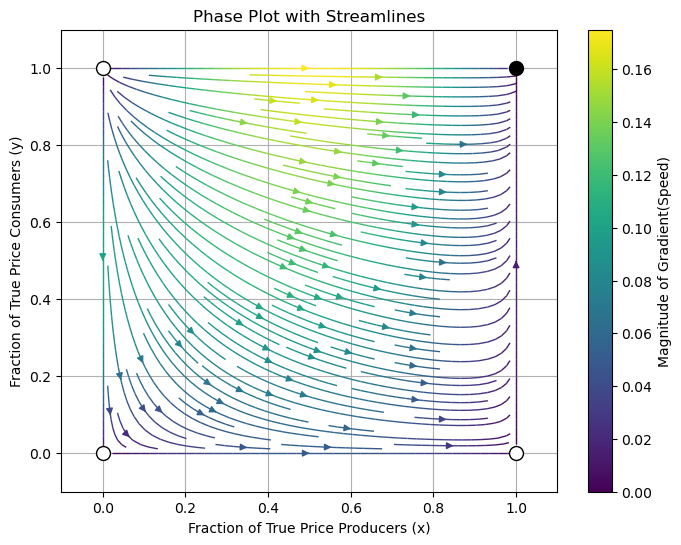

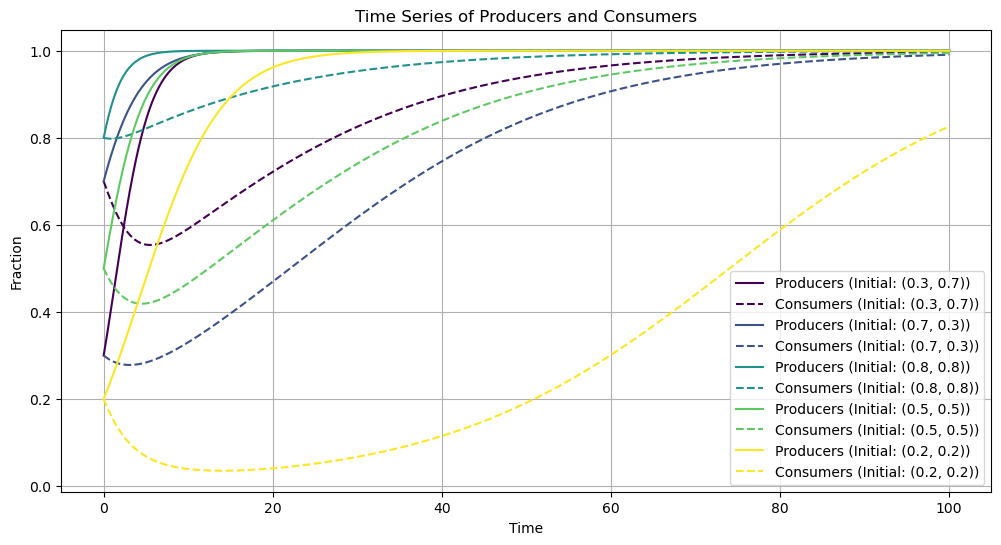

  Equilibrium point (0,0): Det=-0.1, Trace=-0.2, Eigenvalues=0.2 & -0.4, stability=Saddle (semistable)
  Equilibrium point (1,0): Det=-0.0, Trace=-0.1, Eigenvalues=-0.2 & 0.1, stability=Saddle (semistable)
  Equilibrium point (0,1): Det=0.3, Trace=1.1, Eigenvalues=0.7 & 0.4, stability=Source (repeller) - unstable
  Equilibrium point (1,1): Det=0.0, Trace=-0.8, Eigenvalues=-0.7 & -0.1, stability=Sink (attractor) - stable
  Equilibrium point (0.8695652173913044,-0.4): Det=0.0, Trace=0.0, Eigenvalues=-0.0+0.1j & 0.0-0.1j, stability=Center - stable


In [75]:
t = np.linspace(0, 100, 1000)

# Parameters
I_p = 0.2  # Green image
G_p = 0.3  # Green sensitivity of Producer
C_N = 0.4  # Cost of product (normal price)
C_T = 0.1*C_N  # Extra cost for True Price
G_c = 0.5  # Green sensitivity of Consumer

initial_conditions = [
    (0.3, 0.7), 
    (0.7, 0.3),
    (0.8, 0.8),
    (0.5, 0.5),
    (0.2, 0.2)

]

xgrid = np.linspace(0, 1, 100)  # More points for a smoother field
ygrid = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xgrid, ygrid)
U, V = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(xgrid.size):
    for j in range(ygrid.size):
        xdot, ydot = system([X[i, j], Y[i, j]], 0, I_p, G_p, C_N, C_T, G_c)
        U[i, j] = xdot
        V[i, j] = ydot

# Normalize the arrows
N = np.sqrt(U**2 + V**2)
U, V = U/N, V/N


# Generate the plot
plt.figure(figsize=(8, 6))
strm = plt.streamplot(X, Y, U, V, density=1.5, color=N, cmap='viridis', linewidth=1)
plt.colorbar(strm.lines, label='Magnitude of Gradient(Speed)')

plt.xlabel('Fraction of True Price Producers (x)')
plt.ylabel('Fraction of True Price Consumers (y)')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Phase Plot with Streamlines')
plt.grid()
plt.plot(0, 0, 'ow', markeredgecolor='k', markersize=10)  
plt.plot(1, 0, 'ow', markeredgecolor='k', markersize=10)  
plt.plot(0, 1, 'ow', markeredgecolor='k', markersize=10)  
plt.plot(1, 1, 'ok', markersize=10)  
x_star = C_N/(-C_T+G_c)
y_star  = -I_p/(I_p+G_p)
plt.plot(x_star, y_star, 'ow', markeredgecolor='k', markersize=10)
plt.show()


        
plt.figure(figsize=(12, 6))

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(initial_conditions)))


for idx, conditions in enumerate(initial_conditions):
    trajectory = odeint(system, conditions, t, args=(I_p, G_p, C_N, C_T, G_c))
    plt.plot(t, trajectory[:, 0], label=f'Producers (Initial: {conditions})', color=colors[idx])
    plt.plot(t, trajectory[:, 1], '--', label=f'Consumers (Initial: {conditions})', color=colors[idx])
plt.title('Time Series of Producers and Consumers')
plt.xlabel('Time')
plt.ylabel('Fraction')
plt.legend()
plt.grid(True)
plt.show()

equilibrium_points = [(0, 0), (1, 0), (0, 1), (1, 1), (x_star, y_star)]

for x, y in equilibrium_points:
        det, trace, eig = det_trace(x, y, I_p, G_p, C_N, C_T, G_c)
        stability_description = stability(x, y, I_p, G_p, C_N, C_T, G_c)
        # Use string formatting to limit the number of decimal places to 1
        print(f"  Equilibrium point ({x},{y}): Det={det:.1f}, Trace={trace:.1f}, Eigenvalues={eig[0]:.1f} & {eig[1]:.1f}, stability={stability_description}")


### Case 3:
Unstable dynamics


C:\Users\iklennert\AppData\Local\Temp\ipykernel_4356\4276005853.py:32: RuntimeWarning: invalid value encountered in divide
  U, V = U/N, V/N


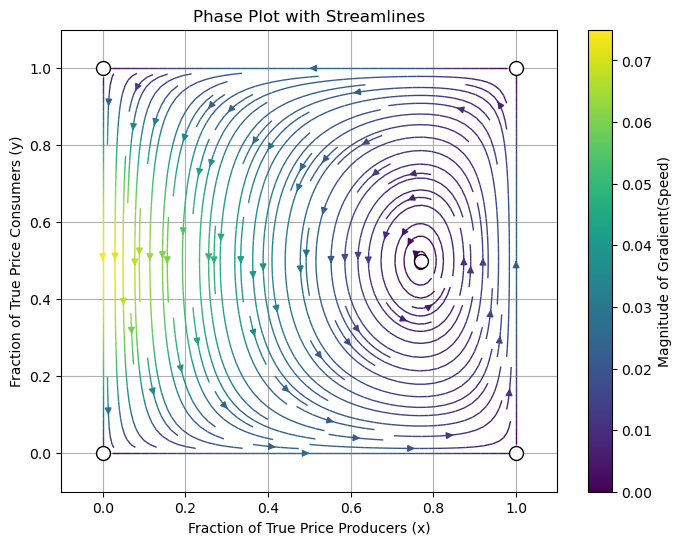

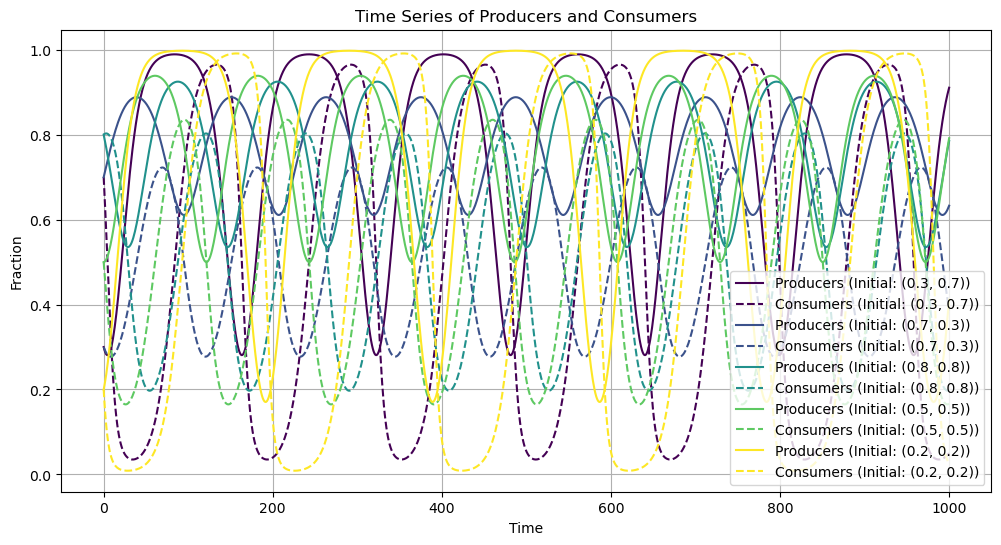

  Equilibrium point (0,0): Det=-0.0, Trace=-0.2, Eigenvalues=0.1 & -0.3, stability=Saddle (semistable)
  Equilibrium point (1,0): Det=-0.0, Trace=-0.0, Eigenvalues=-0.1 & 0.1, stability=Saddle (semistable)
  Equilibrium point (0,1): Det=-0.0, Trace=0.2, Eigenvalues=-0.1 & 0.3, stability=Saddle (semistable)
  Equilibrium point (1,1): Det=-0.0, Trace=0.0, Eigenvalues=0.1 & -0.1, stability=Saddle (semistable)
  Equilibrium point (0.7692307692307692,0.5000000000000001): Det=0.0, Trace=0.0, Eigenvalues=0.0+0.1j & 0.0-0.1j, stability=Spiral source (repeller) - unstable


In [76]:
t = np.linspace(0, 1000, 1000)

# Parameters
I_p = 0.1  # Green image
G_p = -0.3  # Green sensitivity of Producer
C_N = 0.3 # Cost of product (normal price)
C_T = 0.01  # Extra cost for True Price
G_c = 0.4 # Green sensitivity of Consumer

initial_conditions = [
    (0.3, 0.7), 
    (0.7, 0.3),
    (0.8, 0.8),
    (0.5, 0.5),
    (0.2, 0.2)

]

xgrid = np.linspace(0, 1, 100)  # More points for a smoother field
ygrid = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xgrid, ygrid)
U, V = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(xgrid.size):
    for j in range(ygrid.size):
        xdot, ydot = system([X[i, j], Y[i, j]], 0, I_p, G_p, C_N, C_T, G_c)
        U[i, j] = xdot
        V[i, j] = ydot

# Normalize the arrows
N = np.sqrt(U**2 + V**2)
U, V = U/N, V/N


# Generate the plot
plt.figure(figsize=(8, 6))
strm = plt.streamplot(X, Y, U, V, density=1.5, color=N, cmap='viridis', linewidth=1)
plt.colorbar(strm.lines, label='Magnitude of Gradient(Speed)')

plt.xlabel('Fraction of True Price Producers (x)')
plt.ylabel('Fraction of True Price Consumers (y)')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Phase Plot with Streamlines')
plt.grid()
plt.plot(0, 0, 'ow', markeredgecolor='k', markersize=10)  
plt.plot(1, 0, 'ow', markeredgecolor='k', markersize=10)  
plt.plot(0, 1, 'ow', markeredgecolor='k', markersize=10)  
plt.plot(1, 1, 'ow', markeredgecolor='k', markersize=10)  
x_star = C_N/(-C_T+G_c)
y_star  = -I_p/(I_p+G_p)
plt.plot(x_star, y_star, 'ow', markeredgecolor='k', markersize=10)
plt.show()


        
plt.figure(figsize=(12, 6))

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(initial_conditions)))


for idx, conditions in enumerate(initial_conditions):
    trajectory = odeint(system, conditions, t, args=(I_p, G_p, C_N, C_T, G_c))
    plt.plot(t, trajectory[:, 0], label=f'Producers (Initial: {conditions})', color=colors[idx])
    plt.plot(t, trajectory[:, 1], '--', label=f'Consumers (Initial: {conditions})', color=colors[idx])
plt.title('Time Series of Producers and Consumers')
plt.xlabel('Time')
plt.ylabel('Fraction')
plt.legend()
plt.grid(True)
plt.show()

equilibrium_points = [(0, 0), (1, 0), (0, 1), (1, 1), (x_star, y_star)]


for x, y in equilibrium_points:
        det, trace, eig = det_trace(x, y, I_p, G_p, C_N, C_T, G_c)
        stability_description = stability(x, y, I_p, G_p, C_N, C_T, G_c)
        # Use string formatting to limit the number of decimal places to 1
        print(f"  Equilibrium point ({x},{y}): Det={det:.1f}, Trace={trace:.1f}, Eigenvalues={eig[0]:.1f} & {eig[1]:.1f}, stability={stability_description}")
